In [1]:
# brew install graphviz
# pip install pydotplus
# pip install scrapy
# pip install --upgrade zope2

from collections import Counter
import foursquare
from ipywidgets import widgets
from IPython.display import display, Image
import json
import matplotlib.pyplot as plt
import numpy as np
import operator
from operator import itemgetter
import pandas as pd
import patsy
import pickle
import pydotplus
import random
import requests
import seaborn as sns
from scrapy import Selector
from scrapy.http import HtmlResponse
from sqlalchemy import create_engine
import sqlite3
#LinReg, LogReg
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression,\
RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Decision trees, Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import textacy
import textacy.data
import time
import unicodedata

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
updated_food = pd.read_pickle('../../../../Accounts/Electo:Computad/\
MacBook Pro/Software/Github/Old_repos/DSI-SF-4-anotherguitar/projects/Capstone Stuff/updated_food.pkl')

In [3]:
# Make a function that will put a 1 in the row if that group is represented, and 0 if not:
def check_group(ref_group, food_groups):
    
    if food_groups == None:
        return 0
    elif len(food_groups.split(',')) == 1:
        if ref_group.replace(',','') in food_groups:
            return 1
        else:
            return 0

    elif len(food_groups.split(',')) >= 1:
        for a_group in food_groups.split(','):
            if ref_group.replace(',','') in a_group:
                return 1
        return 0
    else:
        return 0

In [4]:
#This will put 1 in for vegan in the target column, and 0 in for the non-vegan items
updated_food.vegan_venue_check = updated_food.vegan_venue_check.map(lambda x: 1 if x == 'vegan' else 0)

In [5]:
updated_vegan = updated_food[updated_food.vegan_venue_check == 1]

In [6]:
fe_columns = [
        'Dairy and Egg Products', 'Spices and Herbs', 'Fats and Oils',
       'Poultry Products', 'Soups, Sauces, and Gravies',
       'Sausages and Luncheon Meats', 'Breakfast Cereals', 'Snacks',
       'Fruits and Fruit Juices', 'Pork Products',
       'Vegetables and Vegetable Products', 'Nut and Seed Products',
       'Beef Products', 'Beverages', 'Finfish and Shellfish Products',
       'Legumes and Legume Products', 'Lamb, Veal, and Game Products',
       'Baked Products', 'Sweets', 'Cereal Grains and Pasta',
       'Meals, Entrees, and Sidedishes'
]

In [7]:
# Able to update as needed for experimentation
tmp_banned_cat = [
    'American Indian/Alaska Native Foods',
    'Baby Foods',
#     'Baked Products',
#     'Beef Products',
#     'Beverages',
#     'Breakfast Cereals',
#     'Cereal Grains and Pasta',
#     'Dairy and Egg Products',
    'Fast Foods',
#     'Fats and Oils',
#     'Finfish and Shellfish Products',
#     'Fruits and Fruit Juices',
#     'Lamb, Veal, and Game Products',
#     'Legumes and Legume Products',
    'Meals, Entrees, and Sidedishes',
#     'Nut and Seed Products',
#     'Pork Products',
#     'Poultry Products',
    'Restaurant Foods',
#     'Sausages and Luncheon Meats',
#     'Snacks',
#     'Soups, Sauces, and Gravies',
#     'Spices and Herbs',
#     'Sweets',
#     'Vegetables and Vegetable Products'
    ]

__First, we can run this on the "item_fg" category__

In [8]:
modelled_food = updated_food.drop([
        'Dairy and Egg Products', 'Spices and Herbs', 'Fats and Oils',
       'Poultry Products', 'Soups, Sauces, and Gravies',
       'Sausages and Luncheon Meats', 'Breakfast Cereals', 'Snacks',
       'Fruits and Fruit Juices', 'Pork Products',
       'Vegetables and Vegetable Products', 'Nut and Seed Products',
       'Beef Products', 'Beverages', 'Finfish and Shellfish Products',
       'Legumes and Legume Products', 'Lamb, Veal, and Game Products',
       'Baked Products', 'Sweets', 'Cereal Grains and Pasta',
       'Meals, Entrees, and Sidedishes'
    ], axis=1)
modelled_food.columns

Index([u'venue_name', u'venue_desc_list', u'vegan_venue_check',
       u'venue_menu_url', u'venue_rated', u'meta_menu_n', u'depth_menus_n',
       u'menu_item_name', u'menu_item_price', u'menu_item_desc',
       u'count_desc_list', u'count_item_name', u'count_item_desc', u'item_fg',
       u'depth_menu_fg', u'item_fg_renewed', u'meta_menu_fg'],
      dtype='object')

In [9]:
for i in fe_columns:
#     print 'next loop'
    if i.replace(',','') not in tmp_banned_cat:
        current_ref_group = i.replace(',','')
        modelled_food[i] = modelled_food.item_fg.map(lambda x: check_group(current_ref_group, x))

now run the model over the dataframe only inclusive of the correct features

In [10]:
modelled_food.columns

Index([u'venue_name', u'venue_desc_list', u'vegan_venue_check',
       u'venue_menu_url', u'venue_rated', u'meta_menu_n', u'depth_menus_n',
       u'menu_item_name', u'menu_item_price', u'menu_item_desc',
       u'count_desc_list', u'count_item_name', u'count_item_desc', u'item_fg',
       u'depth_menu_fg', u'item_fg_renewed', u'meta_menu_fg',
       u'Dairy and Egg Products', u'Spices and Herbs', u'Fats and Oils',
       u'Poultry Products', u'Soups, Sauces, and Gravies',
       u'Sausages and Luncheon Meats', u'Breakfast Cereals', u'Snacks',
       u'Fruits and Fruit Juices', u'Pork Products',
       u'Vegetables and Vegetable Products', u'Nut and Seed Products',
       u'Beef Products', u'Beverages', u'Finfish and Shellfish Products',
       u'Legumes and Legume Products', u'Lamb, Veal, and Game Products',
       u'Baked Products', u'Sweets', u'Cereal Grains and Pasta',
       u'Meals, Entrees, and Sidedishes'],
      dtype='object')

In [11]:
# we're only looking at item_fg, so drop the others
modelled_food = modelled_food.drop([
        'venue_desc_list', 'venue_menu_url', 'depth_menu_fg', 'item_fg_renewed', 'meta_menu_fg'
    ], axis=1)

Now, we have the target at column index 1 (second column), and 25 primary targets. I've also included additional targets like 'venue_rated','meta_menu_n', 'depth_menus_n', 'menu_item_name', 'menu_item_price', 'menu_item_desc', 'count_desc_list', 'count_item_name','count_item_desc' in the hopes that they may improve (or at a minimum, not detract from) the quality of my models.

^ In fact, this was mistaken, they arbitrarily improved my models. Below, I have modelled a heatmap with only the numeric columns...

In [12]:
modelled_food = modelled_food.drop([
        'venue_name', 'meta_menu_n','depth_menus_n', 'menu_item_name', 'menu_item_desc',
        'venue_rated', 'menu_item_price','item_fg'
    ], axis=1)
modelled_food.columns

Index([u'vegan_venue_check', u'count_desc_list', u'count_item_name',
       u'count_item_desc', u'Dairy and Egg Products', u'Spices and Herbs',
       u'Fats and Oils', u'Poultry Products', u'Soups, Sauces, and Gravies',
       u'Sausages and Luncheon Meats', u'Breakfast Cereals', u'Snacks',
       u'Fruits and Fruit Juices', u'Pork Products',
       u'Vegetables and Vegetable Products', u'Nut and Seed Products',
       u'Beef Products', u'Beverages', u'Finfish and Shellfish Products',
       u'Legumes and Legume Products', u'Lamb, Veal, and Game Products',
       u'Baked Products', u'Sweets', u'Cereal Grains and Pasta',
       u'Meals, Entrees, and Sidedishes'],
      dtype='object')

In [ ]:
sns.heatmap(modelled_food)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



Traceback (most recent call last):


//anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/axis.py:1017: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "//anaconda/envs/dsi/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/dsi/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/kernelb

Here, I'll first take a look at basic Linear and Logistic Regressions

In [280]:
Xr = modelled_food.iloc[:,1:]
yr = modelled_food.vegan_venue_check.values

Xc = modelled_food.iloc[:,1:]
yc = modelled_food.vegan_venue_check

In [15]:
# Linear
reg_scores = cross_val_score(LinearRegression(), Xr, yr, cv=4)
#Logistic
cls_scores = cross_val_score(LogisticRegression(), Xc, yc, cv=4)

print 'Linear Regression:', reg_scores, np.mean(reg_scores)
print 'Logistic Regression:', cls_scores, np.mean(cls_scores)

linreg = LinearRegression().fit(Xr, yr)
logreg = LogisticRegression().fit(Xc, yc)

Linear Regression: [-0.00433492  0.06956566  0.04609983  0.06665448] 0.044496260022
Logistic Regression: [ 0.97930085  0.97934435  0.97867709  0.9701035 ] 0.976856448558


__LogReg is way overfitting, and is thus not viable, but just to be sure, I ran some tests on it below to confirm:__

In [26]:
ss = StandardScaler()
nXr = ss.fit_transform(Xr)

lr_params = {'penalty':['l1','l2'],
             'solver':['liblinear'],
             'C':np.linspace(0.000001, 10, 20)
            }

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(nXr, yr)
print "Best LogReg Parameters:", lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   26.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  1.9min


Best LogReg Parameters: {'penalty': 'l1', 'C': 9.9999999999999995e-07, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.9min finished


In [27]:
nXr_train, nXr_test, yr_train, yr_test = train_test_split(nXr, yr, train_size=0.7, stratify=yr)

model_lr = best_lr.fit(nXr_train, yr_train)
predict_lr = model_lr.predict(nXr_test)
lr_score = model_lr.score(nXr_test, yr_test)

lr_report = classification_report(yr_test, predict_lr)

print 'LogReg Score:', lr_score
print lr_report

LogReg Score: 0.97934480844
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     26457
          1       0.00      0.00      0.00       558

avg / total       0.96      0.98      0.97     27015



Interestingly, the linear regression automatically returns better (over 2x) than baseline (which was at 2.07%), of about 4.4%. So technically, I already know that my food groups are performing okay relative to baseline. The logistic regression, though is clearly overfitting.

In [266]:
dtr = DecisionTreeRegressor(max_depth=None)
dtr.fit(Xr, yr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [268]:
dtr_scores = cross_val_score(dtr, Xr, yr, cv=4)
print dtr_scores, np.mean(dtr_scores)
# Already I've been able to double my predictive score again, to something closer to 8 percent, but unfortunately,
# the model is attributing this primarily to the number of words in the venue description categories. (lol)

[-0.08800204  0.00753641 -0.01855345 -0.05210493] -0.0377810016245


In [118]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(Xr, yr)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [119]:
dtr_scores = cross_val_score(dtr, Xr, yr, cv=4)
print dtr_scores, np.mean(dtr_scores)
# Already I've been able to double my predictive score again, to something closer to 8 percent, but unfortunately,
# the model is attributing this primarily to the number of words in the venue description categories. (lol)

[ 0.01308817  0.12320949  0.07589955  0.11230577] 0.0811257446667


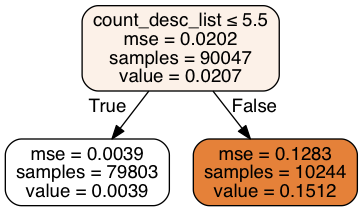

In [120]:
dot_data = StringIO()  

export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [293]:
Xr = modelled_food.iloc[:,1:]
yr = modelled_food.vegan_venue_check.values

Xr = Xr.drop([
    'count_desc_list','count_item_name','count_item_desc'
], axis=1)

In [294]:
ss = StandardScaler()
nXr = ss.fit_transform(Xr)

In [295]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, train_size=.7, stratify=yr)

In [296]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(nXr, yr)

dtr_scores = cross_val_score(dtr, nXr, yr, cv=4)
print dtr_scores, np.mean(dtr_scores)
# Here I'm hoping to see what sort of results we get on a train test split

[-0.01943117 -0.00618892  0.00145919 -0.00252584] -0.00667168575987


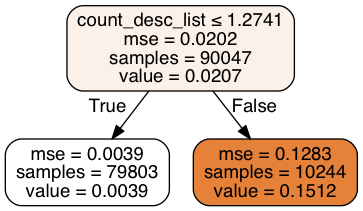

In [284]:
dot_data = StringIO()  

export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [31]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, train_size=0.7, stratify=yr)
print Xr_train.shape, yr_train.shape
print Xr_test.shape, yr_test.shape

(63032, 24) (63032,)
(27015, 24) (27015,)


In [33]:
dtc = DecisionTreeClassifier()
# dtc_params = {
#     'max_depth':[None,1,2,3,4],
#     'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
#     'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
# }

dtc_params = {
    'max_depth':[2,3,4],
    'max_features':[None],
    'min_samples_split':[2,3,4,5]
}

dtc_gs = GridSearchCV(dtc, dtc_params, n_jobs=-1, cv=5, verbose=1)

dtc_gs.fit(Xr_train, yr_train)
dtc_scores = cross_val_score(dtc, Xc, yc, cv=4)
print 'DT Classifier:', dtc_scores, np.mean(dtc_scores)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.5s finished


DT Classifier: [ 0.97494781  0.96992715  0.96686065  0.96619431] 0.969482477203


In [34]:
## Print best estimator, best parameters, and best score
dtc_best_estimator = dtc_gs.best_estimator_
print "best estimator\n", dtc_best_estimator

print "\n=========="
dct_best_param = dtc_gs.best_params_
print "best parameters\n",  dct_best_param 

print "\n=========="
print "best score\n", dtc_gs.best_score_

best estimator
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

best parameters
{'max_features': None, 'min_samples_split': 2, 'max_depth': 4}

best score
0.979946693743


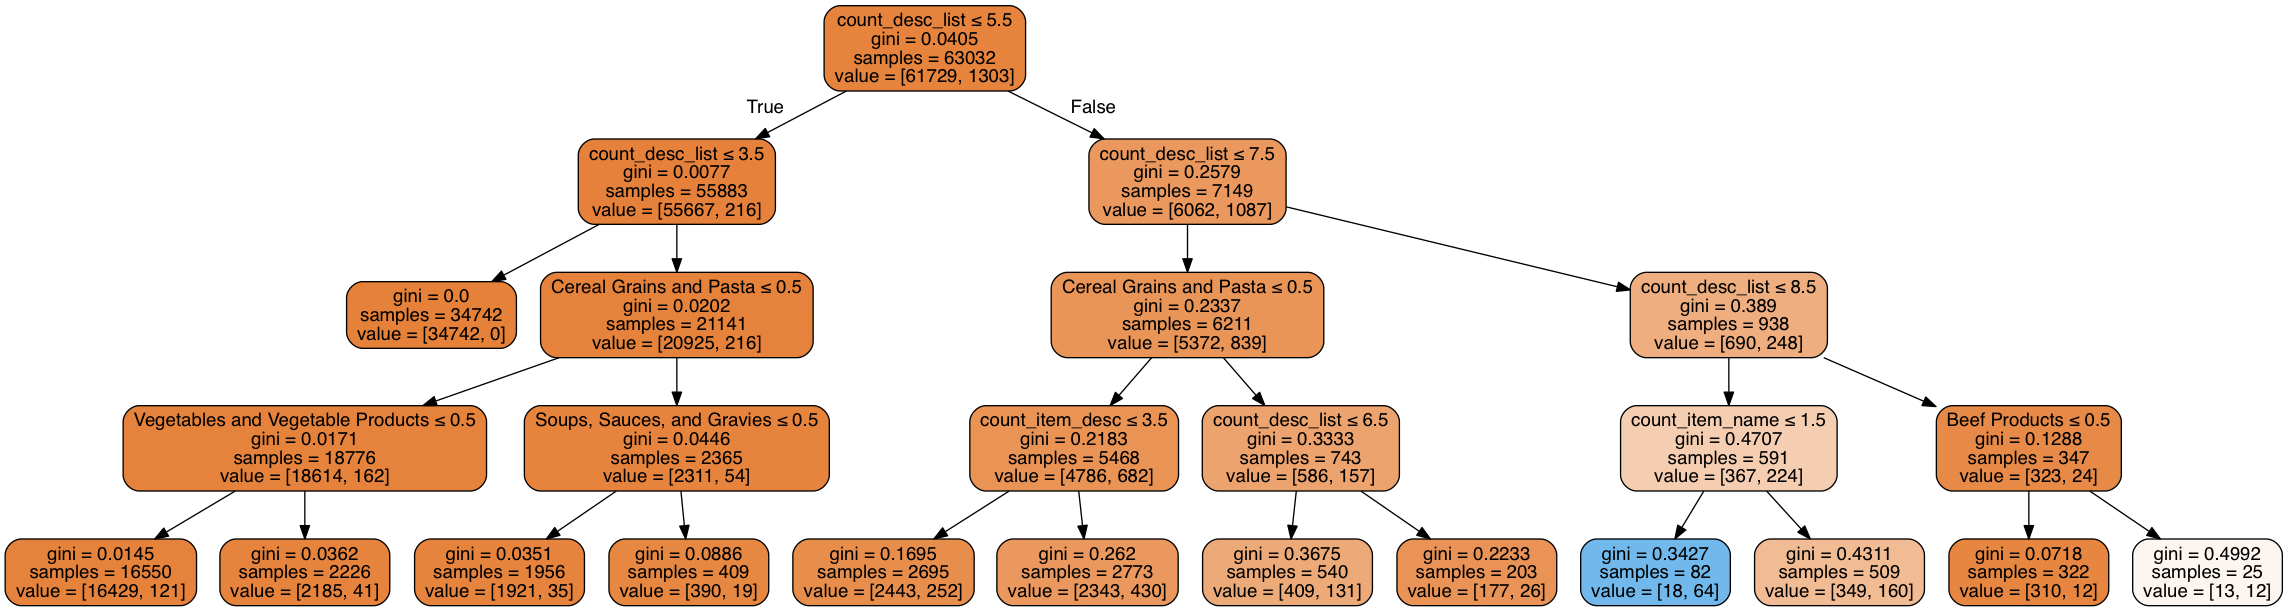

In [35]:
dot_data = StringIO()  

export_graphviz(dtc_best_estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [36]:
## Print Feature importances
feature_importance = pd.DataFrame({'feature':Xr.columns, 
                                   'importance':dtc_best_estimator.feature_importances_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance.head(10)

,feature,importance
0,count_desc_list,0.851371
1,count_item_name,0.073771
22,Cereal Grains and Pasta,0.025609
2,count_item_desc,0.024899
15,Beef Products,0.021860
7,"Soups, Sauces, and Gravies",0.001327
13,Vegetables and Vegetable Products,0.001164
14,Nut and Seed Products,0.000000
21,Sweets,0.000000
20,Baked Products,0.000000


In [37]:
yr_pred= dtc_gs.predict(Xr_test)
cls_rep = classification_report(yr_test, yr_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     26457
          1       0.65      0.04      0.07       558

avg / total       0.97      0.98      0.97     27015



[[26445    12]
 [  536    22]]


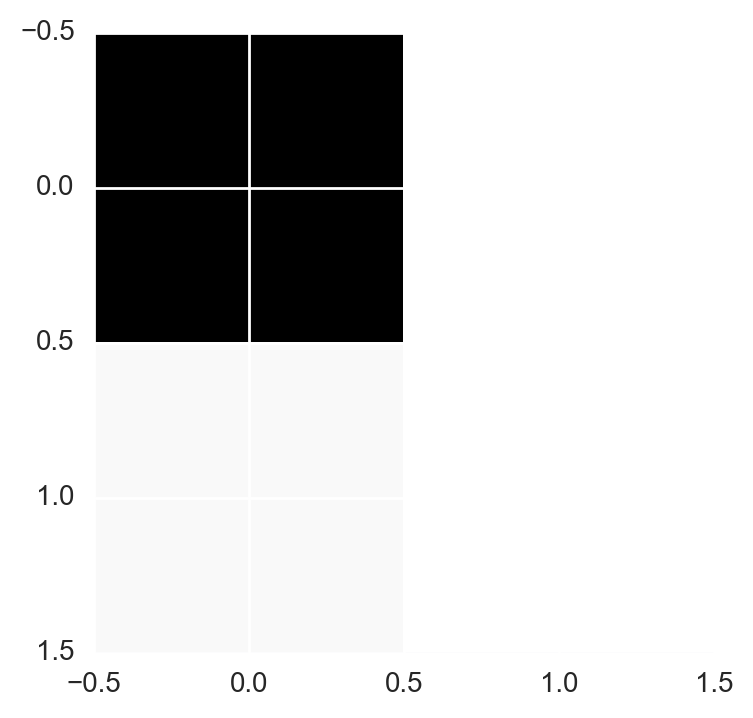

In [47]:
# Confusion Matrix
conf = confusion_matrix(yr_test, yr_pred)
print conf

plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [49]:
rfc = RandomForestClassifier()

# rf_params = {'max_features':[None,'log2','sqrt', 2,3,4,5],
#              'max_depth':[1,2,3,None],
#              'min_samples_leaf':np.linspace(1,101,10),
#              'n_estimators':[100]
#             }

rf_params = {'max_features':[4,5],
             'max_depth':[None],
             'min_samples_leaf':np.linspace(1,101,5),
             'n_estimators':[100]
            }

rf_gs = GridSearchCV(rfc, rf_params, cv=3, verbose=1, n_jobs=-1)

# fit
rf_gs.fit(Xr_train, yr_train)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 24.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None], 'min_samples_leaf': array([   1.     ,   12.11111,   23.22222,   34.33333,   45.44444,
         56.55556,   67.66667,   78.77778,   89.88889,  101.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [50]:
# Print best estimator, best parameters, and best score
rfc_best = rf_gs.best_estimator_
print "best estimator\n", rfc_best
print "\n=========="
print "best parameters\n", rf_gs.best_params_
print "\n=========="
print "best score\n", rf_gs.best_score_

best estimator
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_samples_leaf=1.0, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

best parameters
{'max_features': 5, 'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1.0}

best score
0.981437999746


In [53]:
## Print Feature importances
feature_importance = pd.DataFrame({ 'feature':Xr.columns, 
                                   'importance':rfc_best.feature_importances_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

# the count categories made up the best of the scores, so I'll consider going back and taking them out, to see how good
# my scores can get on their own

,feature,importance
0,count_desc_list,0.259339
2,count_item_desc,0.210914
1,count_item_name,0.157637
7,"Soups, Sauces, and Gravies",0.027021
20,Baked Products,0.024975
5,Fats and Oils,0.023566
16,Beverages,0.023452
10,Snacks,0.022118
11,Fruits and Fruit Juices,0.020984
3,Dairy and Egg Products,0.020944


In [54]:
yr_pred_rfc= rfc_best.predict(Xr_test)
cls_rep = classification_report(yr_test, yr_pred_rfc)
print cls_rep

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     26457
          1       0.67      0.33      0.44       558

avg / total       0.98      0.98      0.98     27015



[[26445    12]
 [  536    22]]


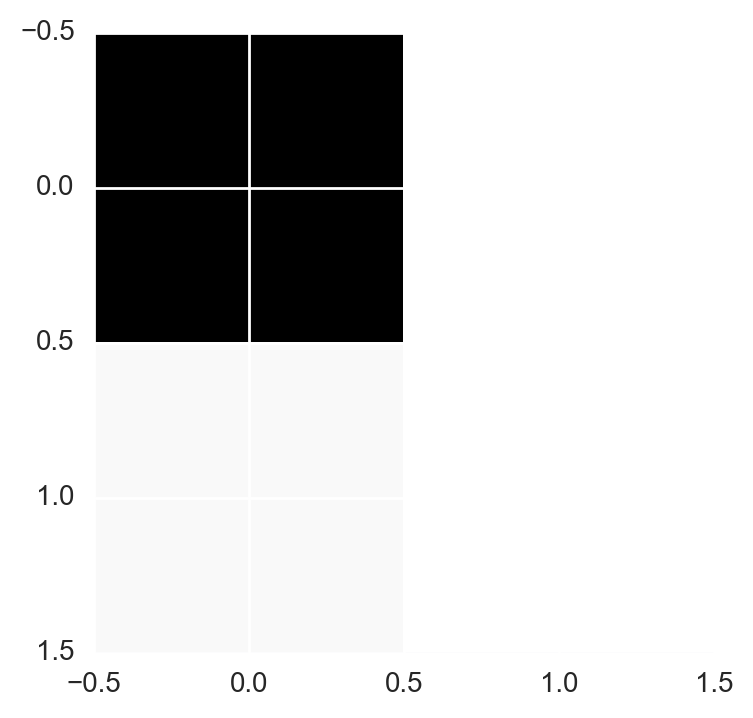

In [55]:
# Confusion Matrix
conf = confusion_matrix(yr_test, yr_pred)
print conf

plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

#ROC curve (overfitted obviously)
http://www.clipartbest.com/cliparts/9T4/5dn/9T45dnrTE.png

Even when I cut out the arbitrary number columns, and redo the RFC, I still have an overfitted model - yet another indicator that the groupings were not accurate.

In [227]:
modelled_food.columns

Index([u'vegan_venue_check', u'count_desc_list', u'count_item_name',
       u'count_item_desc', u'Dairy and Egg Products', u'Spices and Herbs',
       u'Fats and Oils', u'Poultry Products', u'Soups, Sauces, and Gravies',
       u'Sausages and Luncheon Meats', u'Breakfast Cereals', u'Snacks',
       u'Fruits and Fruit Juices', u'Pork Products',
       u'Vegetables and Vegetable Products', u'Nut and Seed Products',
       u'Beef Products', u'Beverages', u'Finfish and Shellfish Products',
       u'Legumes and Legume Products', u'Lamb, Veal, and Game Products',
       u'Baked Products', u'Sweets', u'Cereal Grains and Pasta',
       u'Meals, Entrees, and Sidedishes'],
      dtype='object')

In [229]:
modelled_food = modelled_food.drop([
    'count_desc_list','count_item_name','count_item_desc'
], axis=1)

In [230]:
modelled_food.columns

Index([u'vegan_venue_check', u'Dairy and Egg Products', u'Spices and Herbs',
       u'Fats and Oils', u'Poultry Products', u'Soups, Sauces, and Gravies',
       u'Sausages and Luncheon Meats', u'Breakfast Cereals', u'Snacks',
       u'Fruits and Fruit Juices', u'Pork Products',
       u'Vegetables and Vegetable Products', u'Nut and Seed Products',
       u'Beef Products', u'Beverages', u'Finfish and Shellfish Products',
       u'Legumes and Legume Products', u'Lamb, Veal, and Game Products',
       u'Baked Products', u'Sweets', u'Cereal Grains and Pasta',
       u'Meals, Entrees, and Sidedishes'],
      dtype='object')

In [231]:
Xr = modelled_food.iloc[:,1:]
yr = modelled_food.vegan_venue_check.values

In [232]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, train_size=0.7, stratify=yr)

In [233]:
rfc = RandomForestClassifier()

rf_params = {'max_features':[None,'log2','sqrt', 2,3,4,5],
             'max_depth':[1,2,3,None],
             'min_samples_leaf':np.linspace(1,101,10),
             'n_estimators':[100]
            }

# rf_params = {'max_features':[4,5],
#              'max_depth':[None],
#              'min_samples_leaf':np.linspace(1,101,5),
#              'n_estimators':[100]
#             }

rf_gs = GridSearchCV(rfc, rf_params, cv=3, verbose=1, n_jobs=-1)

# fit
rf_gs.fit(Xr_train, yr_train)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 17.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None], 'min_samples_leaf': array([   1.     ,   12.11111,   23.22222,   34.33333,   45.44444,
         56.55556,   67.66667,   78.77778,   89.88889,  101.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [234]:
# Print best estimator, best parameters, and best score
rfc_best = rf_gs.best_estimator_
print "best estimator\n", rfc_best
print "\n=========="
print "best parameters\n", rf_gs.best_params_
print "\n=========="
print "best score\n", rf_gs.best_score_

best estimator
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1.0, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

best parameters
{'max_features': None, 'n_estimators': 100, 'max_depth': 1, 'min_samples_leaf': 1.0}

best score
0.979327960401


In [235]:
## Print Feature importances
feature_importance = pd.DataFrame({ 'feature':Xr.columns, 
                                   'importance':rfc_best.feature_importances_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

# the count categories made up the best of the scores, so I'll consider going back and taking them out, to see how good
# my scores can get on their own

,feature,importance
15,Legumes and Legume Products,0.89
10,Vegetables and Vegetable Products,0.11
11,Nut and Seed Products,0.00
19,Cereal Grains and Pasta,0.00
18,Sweets,0.00
17,Baked Products,0.00
16,"Lamb, Veal, and Game Products",0.00
14,Finfish and Shellfish Products,0.00
13,Beverages,0.00
12,Beef Products,0.00


In [236]:
yr_pred_rfc= rfc_best.predict(Xr_test)
cls_rep = classification_report(yr_test, yr_pred_rfc)
print cls_rep

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     26457
          1       0.00      0.00      0.00       558

avg / total       0.96      0.98      0.97     27015



[[26426    31]
 [  555     3]]


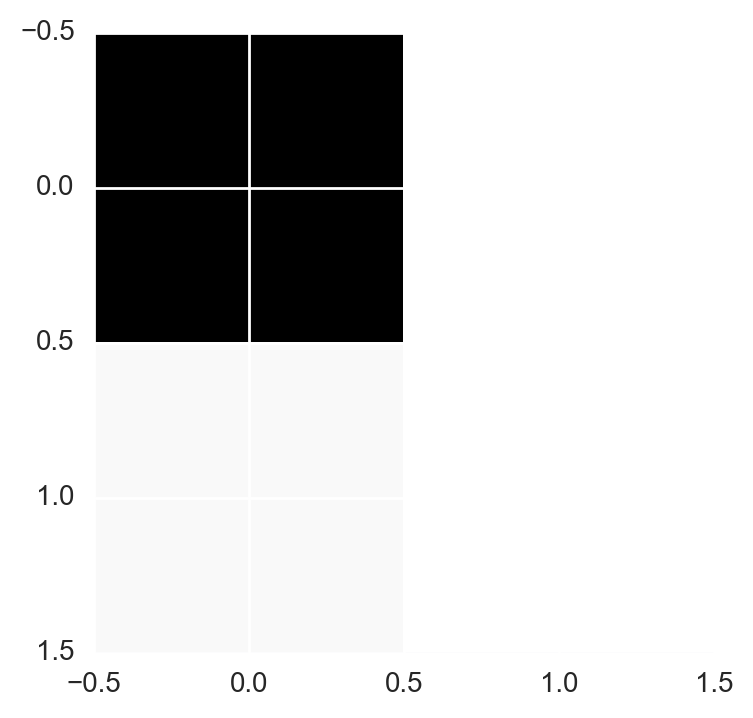

In [237]:
# Confusion Matrix
conf = confusion_matrix(yr_test, yr_pred)
print conf

plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [ ]:
#be sure to show a confusion matrix for each result, and also an ROC curve
#then, when i find a model i like, i can also look into bagging and boosting

more ambiguous steps that i'll later have to push to the top, because all my features should leverage these things, like: (OR NOT?)

STOP WORDS

In [92]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print stemmer.stem('Swimmed')
print stemmer.stem('Swimming')

#maybe do POS? except more processing power required usually
# from nltk.tag import pos_tag
# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()
# pos_tag(tok.tokenize("today is a great day to learn nlp"))

hashing vectorizer might be helpful for going through all the descriptions for each food group (if i had more time)...

In [ ]:
# from sklearn.feature_extraction.text import HashingVectorizer
# hvec = HashingVectorizer()
# hvec.fit([spam])
# Slide Type
# #
# # .todense() is just returning it as an array.. toarray() would be a nicer name for this in sklearn
# #####
# df  = pd.DataFrame(hvec.transform([spam]).todense())
# df.transpose().sort_values(0, ascending=False).head(10).transpose()

## Leveraging the  TFIDF vectorizer

__Menu item names__

Below, I've shown that for the vegan and omni subsets, the top food groups are fairly similar, implying that my model would be well served by improving my group identification (custom vectorizing) process. The 'bad' indicates my first attempt at identifying groups with a more simplistic vectorizer; the 'good' indicates the vectorizer that applies as many groups as possible to every string.

    - 1.) For the omni subset, I primarily improved the 'Soups, Sauces, and Gravies' and 'Sausages and Luncheon Meats' groups, because they were receiving the bulk of tags. However, it looks like I continue to have a lot of tagging for the 'Legumes and Legumes Products' group. But looking at the most common bigrams from the un processed item names, we can see that the most surfaced omni goods are drinks that share common names.
    - 2.) For the vegan subset, I immediately noticed that, unlike the omni subset, popular n-grams are actually food references, not beverages. Then looking at the 'bad' and 'good' groupings, I noticed that there is more diversity of groupings in general than the omni counterpart. But, I also see how the 'bad' groupings actually shows more diverse results. This is because, with the 'bad' script, I had limited my custom vectorizer to only consider the top 3 food group matches. The 'good' script is really just surfacing more of the outlier foodgroups (which may be more common), in turn overshadowing other food groups that may be more popular. This occurs because TFIDF is looking at the notable groups, whereas my custom vectorizer just attempted to rank the best matches for possible food groups.

In [190]:
updated_food.meta_menu_fg = updated_food.meta_menu_fg.map(lambda x: '' if x == None else x)
updated_food.depth_menu_fg = updated_food.depth_menu_fg.map(lambda x: '' if x == None else x)
updated_food.item_fg = updated_food.item_fg.map(lambda x: '' if x == None else x)
updated_food.item_fg_renewed = updated_food.item_fg_renewed.map(lambda x: '' if x == None else x)

In [191]:
updated_vegan = updated_food[updated_food.vegan_venue_check == 1]

In [127]:
mm_o_summ = ' '.join(updated_food.meta_menu_n)
mm_fg_summ = ' '.join(updated_food.meta_menu_fg)
dm_o_summ = ' '.join(updated_food.depth_menus_n)
dm_fg_summ = ' '.join(updated_food.depth_menu_fg)
name_o_summ = ' '.join(updated_food.menu_item_name) 
name_fg_summ_bad = ' '.join(updated_food.item_fg)
name_fg_summ_good = ' '.join(updated_food.item_fg_renewed)
desc_o_summ = ' '.join(updated_food.menu_item_desc)

In [129]:
# for omni - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(name_o_summ)
Counter(ngrams_summaries).most_common(8)

[(u'napa valley', 620),
 (u'pinot noir', 362),
 (u'russian river', 277),
 (u'of the', 233),
 (u'cabernet sauvignon', 222),
 (u'1er cru', 210),
 (u'and sour', 196),
 (u'sauvignon blanc', 189)]

In [126]:
# for omni - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(name_fg_summ_bad)
Counter(ngrams_summaries).most_common(5)

[(u'sauces and', 20433),
 (u'and luncheon', 16227),
 (u'soups sauces', 15148),
 (u'soups sauces and', 15148),
 (u'sausages and luncheon', 11952)]

In [119]:
# for omni - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(name_fg_summ_good)
Counter(ngrams_summaries).most_common(5)

[(u'and legume', 50625),
 (u'sauces and', 49035),
 (u'and vegetable', 48323),
 (u'legumes and legume', 46896),
 (u'legumes and', 46896)]

In [130]:
name_o_summ = ' '.join(updated_vegan.menu_item_name)
name_fg_summ_bad = ' '.join(updated_vegan.item_fg)
name_fg_summ_good = ' '.join(updated_vegan.item_fg_renewed)

In [131]:
# for vegan - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(name_o_summ)
Counter(ngrams_summaries).most_common(8)

[(u'and sour', 19),
 (u'bean curd', 13),
 (u'fried rice', 9),
 (u'black bean', 9),
 (u'unit vegan', 9),
 (u'fried ricesteamed', 8),
 (u'and veggie', 7),
 (u'tofu and', 7)]

In [124]:
# for vegan - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(name_fg_summ_bad)
Counter(ngrams_summaries).most_common(5)

[(u'sauces and', 483),
 (u'and vegetable', 379),
 (u'and legume', 372),
 (u'grains and', 337),
 (u'and gravies', 328)]

In [116]:
# for vegan - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(name_fg_summ_good)
Counter(ngrams_summaries).most_common(5)

[(u'and legume', 1224),
 (u'and vegetable', 1142),
 (u'sauces and', 1126),
 (u'legume products', 1108),
 (u'and legume products', 1108)]

__MetaMenus__

The omni subset is basically signalling that my grouping vectorizer basically just batches anything that is 'main' as likely belonging to the 'Vegetables and Vegetables Products' group. This further shows some areas of improvement that I could make with batching strings into food groups. A similar pattern arises with my vegan subset, where anything that contains 'main' is batched into one of the more popular food groups for the vegan subset, namely the 'Legumes and Legumes Products.'

In [135]:
mm_o_summ = ' '.join(updated_food.meta_menu_n)
mm_fg_summ = ' '.join(updated_food.meta_menu_fg)
dm_o_summ = ' '.join(updated_food.depth_menus_n)
dm_fg_summ = ' '.join(updated_food.depth_menu_fg)

In [136]:
# for omni - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(mm_o_summ)
Counter(ngrams_summaries).most_common(8)

[(u'main menu', 30075),
 (u'menu main', 29987),
 (u'menu main menu', 29985),
 (u'main menu main', 29815),
 (u'main menu main menu', 29813),
 (u'menu main menu main', 29725),
 (u'menu main menu main menu', 29723),
 (u'main menu main menu main', 29553)]

In [137]:
# for omni - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(mm_fg_summ)
Counter(ngrams_summaries).most_common(5)

[(u'vegetables and vegetable', 35023),
 (u'vegetable products', 35023),
 (u'vegetables and', 35023),
 (u'and vegetable', 35023),
 (u'and vegetable products', 35023)]

In [138]:
mm_o_summ = ' '.join(updated_vegan.meta_menu_n)
mm_fg_summ = ' '.join(updated_vegan.meta_menu_fg)

In [139]:
# for vegan - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(mm_o_summ)
Counter(ngrams_summaries).most_common(5)

[(u'main menu', 623),
 (u'menu main menu', 620),
 (u'menu main', 620),
 (u'main menu main menu', 617),
 (u'main menu main', 617)]

In [140]:
# for vegan - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(mm_fg_summ)
Counter(ngrams_summaries).most_common(5)

[(u'and legume products', 646),
 (u'legumes and legume products', 646),
 (u'legumes and', 646),
 (u'and legume', 646),
 (u'legume products', 646)]

__SubMenus__

Running through the submenus to find n-grams reveals that the omni and vegan subsets are actually very similar as far as the groupings that resulted - namely that 'baked products' and 'legume products' surfaced commonly. However, while the omni submenus tend to use appetizer menus more frequently, vegan submenus tend to use 'special' fairly commonly, indicating that perhaps vegan restaurants are keen on highlighting how their options are differentiated.

In [141]:
dm_o_summ = ' '.join(updated_food.depth_menus_n)
dm_fg_summ = ' '.join(updated_food.depth_menu_fg)

In [142]:
# for omni - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(dm_o_summ)
Counter(ngrams_summaries).most_common(8)

[(u'appetizers appetizers', 2162),
 (u'appetizers appetizers appetizers', 1892),
 (u'appetizers appetizers appetizers appetizers', 1628),
 (u'main main', 1489),
 (u'sides sides', 1420),
 (u'appetizers appetizers appetizers appetizers appetizers', 1374),
 (u'main main main', 1363),
 (u'salads salads', 1350)]

In [143]:
# for omni - 
vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(dm_fg_summ)
Counter(ngrams_summaries).most_common(8)

[(u'baked products', 36469),
 (u'and legume', 34682),
 (u'legume products', 34682),
 (u'legumes and legume', 34682),
 (u'legumes and legume products', 34682),
 (u'legumes and', 34682),
 (u'and legume products', 34682),
 (u'soups sauces', 30774)]

In [219]:
dm_o_summ = ' '.join(updated_vegan.depth_menus_n)
dm_fg_summ = ' '.join(updated_vegan.depth_menu_fg)

In [223]:
# for vegan - 

vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(dm_o_summ)
Counter(ngrams_summaries).most_common(5)

[(u'lunch special', 70),
 (u'lunch special lunch special', 68),
 (u'lunch special lunch', 68),
 (u'special lunch', 68),
 (u'special lunch special', 68)]

In [222]:
# for vegan - 

vect = TfidfVectorizer(stop_words='english', ngram_range=(2,5))

ngrams_summaries = vect.build_analyzer()(dm_fg_summ)
Counter(ngrams_summaries).most_common(5)

[(u'baked products', 955),
 (u'legume products', 896),
 (u'legumes legume', 896),
 (u'legumes legume products', 896),
 (u'soups sauces gravies', 809)]

__Then, we can run this on the item_fg_renewed category__

__We can also run this on the depth_menu_fg category__

__And finally on the meta_menu_fg category__

__TRY THE COUNT VECTORIZER__

In [211]:
mm_o_summ = ' '.join(updated_food.meta_menu_n)
mm_fg_summ = ' '.join(updated_food.meta_menu_fg)
dm_o_summ = ' '.join(updated_food.depth_menus_n)
dm_fg_summ = ' '.join(updated_food.depth_menu_fg)
name_o_summ = ' '.join(updated_food.menu_item_name) 
name_fg_summ_bad = ' '.join(updated_food.item_fg)
name_fg_summ_good = ' '.join(updated_food.item_fg_renewed)
desc_o_summ = ' '.join(updated_food.menu_item_desc)

In [224]:
cvec = CountVectorizer(stop_words='english', ngram_range=(2,5))
X = cvec.fit_transform(name_o_summ)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
item_df = pd.DataFrame(X.toarray(), columns=cvec.get_feature_names())
item_df.sum().sort_values().tail(20).plot(kind='barh', figsize=(9, 4))

# df.transpose().sort_values(0, ascending=False).head(10).transpose()

In [209]:
# food_set = updated_food[updated_food.item_fg_renewed != ''][updated_food.item_fg_renewed != 'Beverages'][updated_food.groupby('item_fg_renewed').item_fg_renewed.transform(len) > 100]

In [205]:
food_set = updated_food[updated_food.item_fg != '']

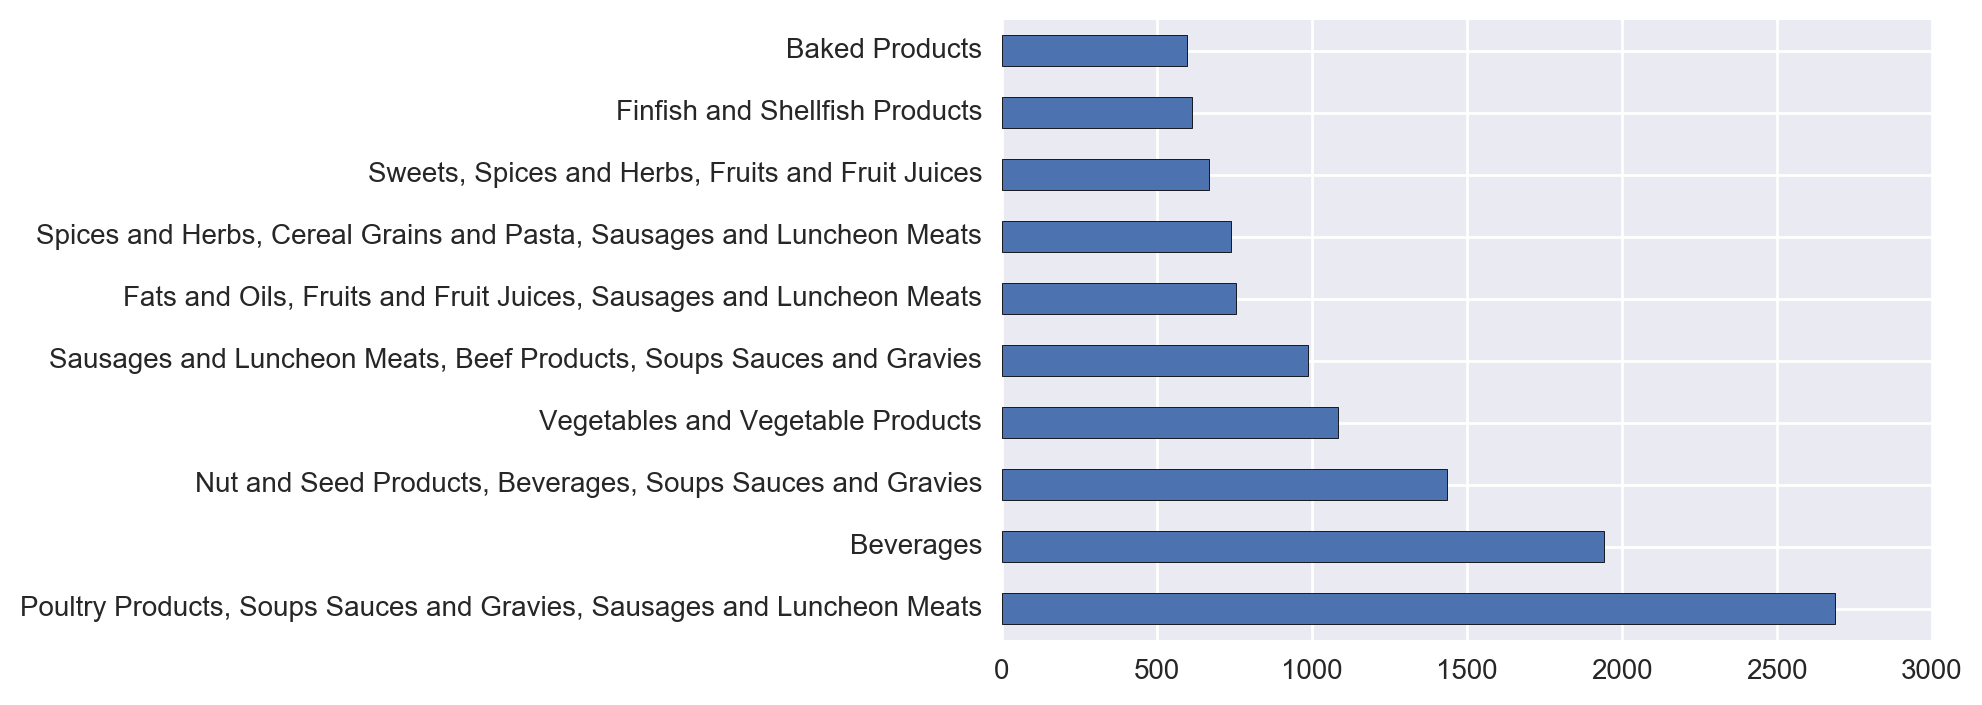

In [208]:
food_set.item_fg.value_counts().head(10).plot(kind='barh')

Potentially interesting things to pursue moving forward - 
LDA - http://localhost:8888/notebooks/x/DSI-SF-4/curriculum/week-08/4.4-topic-modeling/slides/4.2-topic-modeling.ipynb
